# DATA_EXPLORATION

The purpose of this notebook is just to visualize all data from dataset. Operations from data won't be done. First of all, we are going to see target variable and then all descriptors. We'll explain more or less what each descriptor means.

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# read data
data = pd.read_csv('../data/US_Accidents_March23_sampled_500k.csv')

In [3]:
# see columns
data.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [4]:
# see each type of variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     500000 non-null  object 
 1   Source                 500000 non-null  object 
 2   Severity               500000 non-null  int64  
 3   Start_Time             500000 non-null  object 
 4   End_Time               500000 non-null  object 
 5   Start_Lat              500000 non-null  float64
 6   Start_Lng              500000 non-null  float64
 7   End_Lat                279623 non-null  float64
 8   End_Lng                279623 non-null  float64
 9   Distance(mi)           500000 non-null  float64
 10  Description            499999 non-null  object 
 11  Street                 499309 non-null  object 
 12  City                   499981 non-null  object 
 13  County                 500000 non-null  object 
 14  State                  500000 non-nu

So, given the cell before with all variables we'll divide variables in sections:
- Target variable: 'Severity'
- Location variables: 'Number', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Airport_Code', 'Timezone'
- Time variables: 'Start_Time', 'End_Time', 'Weather_Timestamp'
- Traffic variables: 'ID', 'Source', 'TMC', 'Description'
- Weather variables: 'Temperature', 'Wind_Chill', 'Humidity', 'Pressure', 'Visibility', 'Wind_Direction', 'Wind_Speed', 'Precipitation', 'Weather_Condition'
- Road variables: 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'
- Period of day variables: 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'

### Target vairable

Text(0, 0.5, 'Frequency')

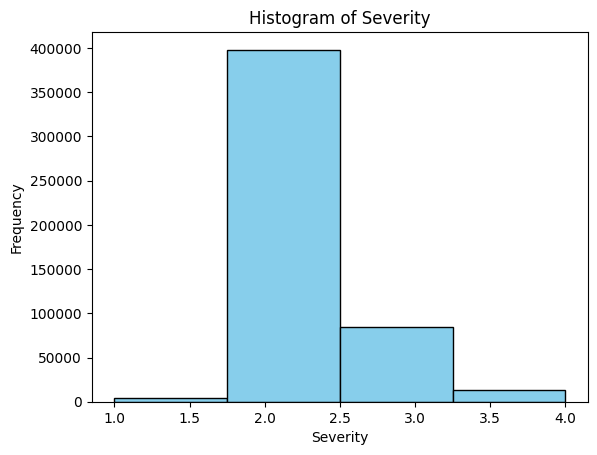

In [5]:
data['Severity'].plot(kind='hist', bins = 4, color = 'skyblue', edgecolor = 'black')

plt.title('Histogram of Severity')
plt.xlabel('Severity')
plt.ylabel('Frequency')

As we can see, it seems this variable seems unbalanced. We have more accidents with severity 2 than 1, 3 and 4. This is important to take into account when we are going to train a model. Better to check the f1-score than accuracy, for instance.

### Location variables

We notice we have several variables that are useless in ordert to visualize. 'Number', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Airport_Code', 'Timezone'

In [12]:
location_variables = ['Number', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Airport_Code', 'Timezone']

data[location_variables].head()

KeyError: "['Number', 'Side'] not in index"

### Time variables

In [11]:
time_variables = ['Start_Time', 'End_Time', 'Weather_Timestamp']

TypeError: 'function' object is not iterable

### Road variables

Notice all road variables are booleans. For this reason we are going to plot a pie chart to see the proportion of each variable. There are no nans in this variables.

In [7]:
road_variables = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

data[road_variables].isna().sum()

Amenity            0
Bump               0
Crossing           0
Give_Way           0
Junction           0
No_Exit            0
Railway            0
Roundabout         0
Station            0
Stop               0
Traffic_Calming    0
Traffic_Signal     0
Turning_Loop       0
dtype: int64

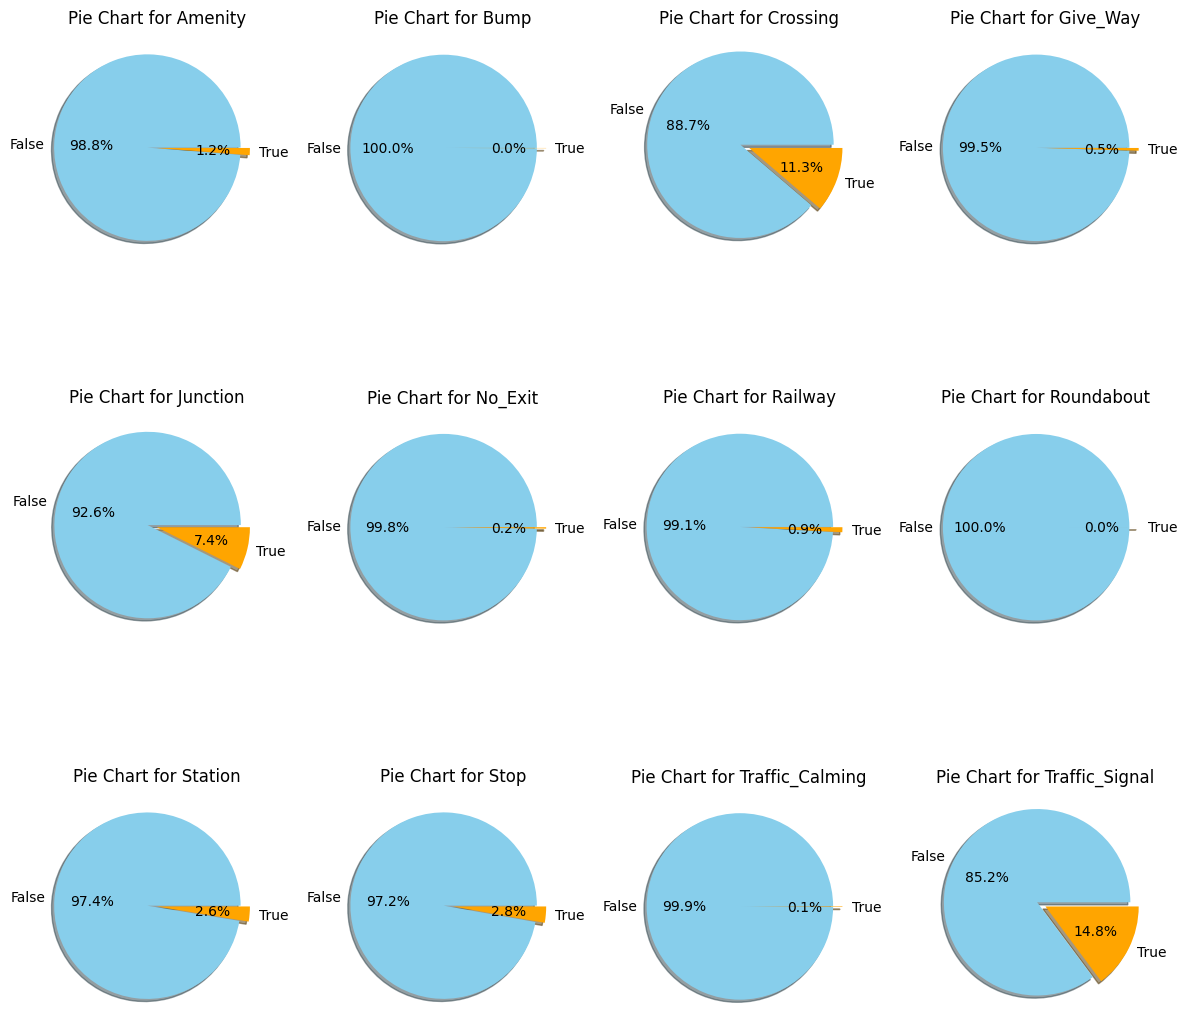

In [8]:
road_variables = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']

fig, axs = plt.subplots(3, 4, figsize=(12, 12))

for i, var in enumerate(road_variables):
    row = i // 4
    col = i % 4
    axs[row, col].pie(data[var].value_counts(), labels=data[var].value_counts().index, autopct='%1.1f%%', colors=['skyblue', 'orange'], explode=(0.1, 0), shadow=True)
    axs[row, col].set_title(f'Pie Chart for {var}')

plt.tight_layout()
plt.show()
    

As we can see, in vast majority of cases, the road variables are False. 

### Period of day variables

In [9]:
period_of_day_variables = ['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

